In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression

# Bitcoin and Stock Market Correlation

## How to compare the cost movement between s&p 500 and bitcoin?

Comparing the cost movement between the S&P 500 and Bitcoin involves analyzing their price changes over time to see how they relate to each other. Here's how you can approach this comparison:

### 1. **Collect Data**
   - **S&P 500**: Obtain historical price data for the S&P 500 index, typically in the form of daily closing prices.
   - **Bitcoin**: Obtain historical price data for Bitcoin, also in daily closing prices.

### 2. **Align Time Periods**
   - Ensure that the data for both assets covers the same time period and is on the same frequency (e.g., daily prices). Align the dates so that each row in your data corresponds to the same day for both the S&P 500 and Bitcoin.

### 3. **Normalize Prices**
   - Since the S&P 500 and Bitcoin have vastly different price levels, it's helpful to normalize their prices. You can do this by converting prices to returns or by indexing both to 100 at the start of your chosen time period.
   - **Returns Calculation**: Calculate the daily return for each asset as:
     \[
     \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
     \]
   - **Indexing**: Set the initial price of both assets to 100 and then calculate the subsequent prices based on their daily returns.

### 4. **Visualize the Data**
   - **Line Chart**: Plot the normalized prices or returns over time on the same chart to visually compare their movements.
   - **Scatter Plot**: Plot the returns of Bitcoin against the returns of the S&P 500 to see if there's any correlation.

### 5. **Statistical Analysis**
   - **Correlation**: Calculate the Pearson correlation coefficient between the daily returns of the S&P 500 and Bitcoin. This will give you a measure of the linear relationship between the two assets. A correlation close to 1 means they move together, while a correlation close to -1 means they move in opposite directions.
   - **Volatility Comparison**: Analyze and compare the volatility (standard deviation of returns) of both assets to understand their risk levels.
   - **Beta**: Calculate Bitcoin's beta with respect to the S&P 500 to see how sensitive Bitcoin is to movements in the S&P 500.

### 6. **Interpret the Results**
   - **Correlation Interpretation**: If the correlation is high, it indicates that Bitcoin and the S&P 500 have been moving similarly. A low or negative correlation suggests they move independently or inversely.
   - **Risk Comparison**: Higher volatility in Bitcoin might indicate higher risk compared to the S&P 500.
   - **Trends and Patterns**: Look for periods where the relationship between the two assets changes, such as during market crashes or bull runs.

### 7. **Advanced Techniques (Optional)**
   - **Rolling Correlation**: Calculate the correlation over a rolling window (e.g., 30 days) to see how the relationship between Bitcoin and the S&P 500 evolves over time.
   - **Cointegration Analysis**: If you're interested in the long-term relationship, you could perform a cointegration test to see if there's a stable, long-term equilibrium between the two.

By following these steps, you'll be able to compare the cost movement between the S&P 500 and Bitcoin, providing insights into how these two different assets interact with each other in the financial markets.

### 8. Links

https://coinbureau.com/analysis/bitcoin-and-stock-market-correlation/

https://www.google.com/search?q=s%26p+500+bitcoin+correlation&oq=s%26p+500+bitcoin+&gs_lcrp=EgZjaHJvbWUqBwgBEAAYgAQyCggAEEUYFhgeGDkyBwgBEAAYgAQyBwgCEAAYgAQyCAgDEAAYFhgeMggIBBAAGBYYHjIICAUQABgWGB4yCAgGEAAYFhgeMggIBxAAGBYYHjIICAgQABgWGB4yCAgJEAAYFhge0gEJMjA3MzVqMGoxqAIAsAIA&sourceid=chrome&ie=UTF-8



## 1. Introduction

Traders analyze the movements of financial instruments to gauge market sentiment and predict trends, operating under the belief that certain assets are correlated. Understanding the correlation between two assets provides valuable insights.

Both Bitcoin and stocks are speculative assets, often traded based on price speculation rather than intrinsic value. This similarity implies that stock movements may reflect the market's risk appetite, potentially allowing predictions about Bitcoin's behavior. Investors willing to take on more risk may invest in these speculative assets.

This analysis evaluates the correlation between stocks and Bitcoin, examining their historical interactions and the impact of macroeconomic factors such as inflation and interest rates. The goal is to determine whether stock market movements can predict Bitcoin's price behavior.

### 1.1. What is Bitcoin?

**Bitcoin** is a decentralized digital currency that you can buy, sell and exchange directly, without an intermediary like a bank. Bitcoin’s creator, Satoshi Nakamoto, originally described the need for “an electronic payment system based on cryptographic proof instead of trust.”

Every Bitcoin transaction that’s ever been made exists on a public ledger accessible to everyone, making transactions hard to reverse and difficult to fake. That’s by design: Core to their decentralized nature, Bitcoins aren’t backed by the government or any issuing institution, and there’s nothing to guarantee their value besides the proof baked in the heart of the system [2].

### 1.2. What Is the S&P 500 Index?

The **S&P 500 Index** or **Standard & Poor's 500 Index** is a market-capitalization-weighted index of 500 leading publicly traded companies in the U.S. The index includes 503 components because three have two share classes listed.

It's not an exact list of the top 500 U.S. companies by market cap because the index includes other criteria. The S&P 500 index is nonetheless regarded as one of the best gauges of prominent American equities' performance and the stock market overall [3].

## 2. Methodology and Research Design

This study uses a quantitative research design to analyze the relationship between **Bitcoin** prices and the **stock market** over the **past five years** with the **S&P 500 Index** serving as a proxy for the stock market.

**TODO: maybe a little bit more about the Methodology and Research Design**

## 3. Data Acquisition

Data were collected from the following sources:

- Bitcoin Prices: Bitcoin's daily closing prices were obtained from [finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD/history/).
- S&P 500 Index: Daily index values were obtained from [finance.yahoo.com](https://finance.yahoo.com/quote/%5EGSPC/history/).

The study period spans **five years**, from August 2019 to August 2024.

## 4. Data Processing

## 4.1. Read Data

### 4.1.1. Read Bitcoin price movement data for the last 5 years

In [2]:
btc_price_data = pd.read_csv("data/btc_usd/BTC-USD-5-Years.csv")
btc_price_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,10126.299805,10512.328125,10126.299805,10370.820313,10370.820313,18438654080
1,2019-08-27,10372.826172,10381.328125,10087.300781,10185.500000,10185.500000,14762609503
2,2019-08-28,10203.426758,10279.366211,9716.656250,9754.422852,9754.422852,17603790323
3,2019-08-29,9756.786133,9756.786133,9421.629883,9510.200195,9510.200195,17045878501
4,2019-08-30,9514.844727,9656.124023,9428.302734,9598.173828,9598.173828,13595263986
...,...,...,...,...,...,...,...
1820,2024-08-19,58480.710938,59612.660156,57864.710938,59493.453125,59493.453125,25911207712
1821,2024-08-20,59493.453125,61396.328125,58610.882813,59012.792969,59012.792969,31613400008
1822,2024-08-21,59014.988281,61834.351563,58823.445313,61175.191406,61175.191406,32731154072
1823,2024-08-22,61168.316406,61408.109375,59815.253906,60381.914063,60381.914063,27625734377


In [3]:
btc_price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1825.0,3.146285e+04,1.847850e+04,5.002578e+03,1.644179e+04,2.862262e+04,4.419298e+04,7.307938e+04
High,1825.0,3.216063e+04,1.891376e+04,5.331834e+03,1.663819e+04,2.916082e+04,4.550324e+04,7.375007e+04
Low,1825.0,3.072027e+04,1.799283e+04,4.106981e+03,1.617050e+04,2.817799e+04,4.332002e+04,7.133409e+04
Close,1825.0,3.149023e+04,1.848509e+04,4.970788e+03,1.644498e+04,2.868054e+04,4.431822e+04,7.308350e+04
Adj Close,1825.0,3.149023e+04,1.848509e+04,4.970788e+03,1.644498e+04,2.868054e+04,4.431822e+04,7.308350e+04
Volume,1825.0,3.117074e+10,1.792905e+10,5.331173e+09,1.931360e+10,2.784951e+10,3.831860e+10,3.509679e+11


In [4]:
btc_price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
btc_price_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 4.1.2. Read S&P 500 price movement data for the last 5 years

In [6]:
sp_500_price_data = pd.read_csv("data/S_and_P_500-5-Years.csv")
sp_500_price_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,2866.699951,2879.270020,2856.000000,2878.379883,2878.379883,2859790000
1,2019-08-27,2893.139893,2898.790039,2860.590088,2869.159912,2869.159912,3537490000
2,2019-08-28,2861.280029,2890.030029,2853.050049,2887.939941,2887.939941,3102480000
3,2019-08-29,2910.370117,2930.500000,2905.669922,2924.580078,2924.580078,3177150000
4,2019-08-30,2937.090088,2940.429932,2913.320068,2926.459961,2926.459961,3009910000
...,...,...,...,...,...,...,...
1253,2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000
1254,2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000
1255,2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000
1256,2024-08-22,5637.770020,5643.220215,5560.950195,5570.640137,5570.640137,2981530000


In [7]:
sp_500_price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,4.062243e+03,6.916520e+02,2.290710e+03,3.591753e+03,4.126600e+03,4.488822e+03,5.644090e+03
High,1258.0,4.086389e+03,6.912662e+02,2.300730e+03,3.624460e+03,4.148055e+03,4.511990e+03,5.669670e+03
Low,1258.0,4.036896e+03,6.927430e+02,2.191860e+03,3.567610e+03,4.098855e+03,4.462755e+03,5.639020e+03
Close,1258.0,4.063164e+03,6.919554e+02,2.237400e+03,3.583590e+03,4.126245e+03,4.486402e+03,5.667200e+03
Adj Close,1258.0,4.063164e+03,6.919554e+02,2.237400e+03,3.583590e+03,4.126245e+03,4.486402e+03,5.667200e+03
Volume,1258.0,4.350750e+09,1.051686e+09,1.296530e+09,3.724205e+09,4.082780e+09,4.705292e+09,9.976520e+09


In [8]:
sp_500_price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
sp_500_price_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 4.2. Exploratory Data Analysis

### 4.2.1. Data-Tidying-and-Cleaning

For further processing, we only need the **date** and the **closing price** on that day from the two data sets.

Create new Dataframe only with **Date** and **Close** columns from the **btc_price_data**:

In [10]:
btc_closing_price_data = btc_price_data[["Date", "Close"]].copy(deep=True)
btc_closing_price_data

,Date,Close
0,2019-08-26,10370.820313
1,2019-08-27,10185.500000
2,2019-08-28,9754.422852
3,2019-08-29,9510.200195
4,2019-08-30,9598.173828
...,...,...
1820,2024-08-19,59493.453125
1821,2024-08-20,59012.792969
1822,2024-08-21,61175.191406
1823,2024-08-22,60381.914063


Convert the `Date` column from *object* type to *datetime64* type.

In [11]:
btc_closing_price_data.Date = pd.to_datetime(btc_closing_price_data.Date)
btc_closing_price_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Create new Dataframe only with **Date** and **Close** columns from the **sp_500_price_data**.

In [12]:
sp_500_closing_price_data = sp_500_price_data[["Date", "Close"]].copy(deep=True)
sp_500_closing_price_data

,Date,Close
0,2019-08-26,2878.379883
1,2019-08-27,2869.159912
2,2019-08-28,2887.939941
3,2019-08-29,2924.580078
4,2019-08-30,2926.459961
...,...,...
1253,2024-08-19,5608.250000
1254,2024-08-20,5597.120117
1255,2024-08-21,5620.850098
1256,2024-08-22,5570.640137


Convert the `Date` column from *object* type to *datetime64* type.

In [13]:
sp_500_closing_price_data.Date = pd.to_datetime(sp_500_closing_price_data.Date)
sp_500_closing_price_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

#### Normalize Prices

To compare price movements directly, it's useful to normalize the prices to a common starting point (e.g., setting both prices to 100 at the start of the period).
This makes it easier to see how each asset has moved in **percentage** terms relative to its starting value.

Values above 100 indicate the percentage increase in price since the beginning. For example, a value of 115 means the price has increased 15% since the base date, while a value of 82 would indicate a decline of 18% since the base date.

$$\text{Normalized Price} = \frac{\text{Current Price}}{\text{Starting Price}} \times 100 \ \left[\% \right]$$

In [14]:
def compute_normalized_price(current_price, starting_price):
    return (current_price / starting_price) * 100

Compute **normalized price** for the **BTC closing price**.

In [15]:
# Get the 'starting_price'
btc_starting_price = btc_closing_price_data.Close.loc[0]
# Compute 'normalized_price'
btc_closing_price_data["Normalized_Price"] = btc_closing_price_data.Close.apply(lambda current_price: compute_normalized_price(current_price, btc_starting_price))
btc_closing_price_data

,Date,Close,Normalized_Price
0,2019-08-26,10370.820313,100.000000
1,2019-08-27,10185.500000,98.213060
2,2019-08-28,9754.422852,94.056425
3,2019-08-29,9510.200195,91.701523
4,2019-08-30,9598.173828,92.549804
...,...,...,...
1820,2024-08-19,59493.453125,573.661980
1821,2024-08-20,59012.792969,569.027244
1822,2024-08-21,61175.191406,589.878038
1823,2024-08-22,60381.914063,582.228910


Compute **normalized price** for the **S&P 500 closing price**.

In [16]:
# Get the 'starting_price'
sp_500_starting_price = sp_500_closing_price_data.Close.loc[0]
# Compute 'normalized_price'
sp_500_closing_price_data["Normalized_Price"] = sp_500_closing_price_data.Close.apply(lambda current_price: compute_normalized_price(current_price, sp_500_starting_price))
sp_500_closing_price_data.head()

,Date,Close,Normalized_Price
0,2019-08-26,2878.379883,100.000000
1,2019-08-27,2869.159912,99.679682
2,2019-08-28,2887.939941,100.332133
3,2019-08-29,2924.580078,101.605076
4,2019-08-30,2926.459961,101.670387


#### Calculate Returns
   - **Daily Returns**: Calculate the daily return for each asset in **percent**.
     $$\text{Daily Return} = \frac{\text{Price on Day 2} - \text{Price on Day 1}}{\text{Price on Day 1}} \times 100 \ \left[\% \right]$$

   - **TODO-Remove this****Cumulative Returns**: Calculate cumulative returns over time to see overall growth.
     $$\text{Cumulative Return} = \left(1 + \text{Daily Return}_1\right) \times \left(1 + \text{Daily Return}_2\right) \times \dots \times \left(1 + \text{Daily Return}_n\right) - 1$$

In [17]:
def calculate_daily_return(prices_arr):
    """
     Calculate the daily return from the values in the 'prices_arr'
    """
    daily_return_prices = []
    price_day_1 = prices_arr[0]

    for price in prices_arr:
        price_day_2 = price

        # Calculate return 
        return_price = ((price_day_2 - price_day_1) / price_day_1) * 100
        daily_return_prices.append(return_price)
        
        price_day_1 = price_day_2
        
    return daily_return_prices

In [18]:
# def calculate_cumulative_returns(daily_returns_arr):
#     cumulative_returns = 1
#     for daily_return in daily_returns_arr:
#         cumulative_returns = cumulative_returns * (1 + daily_return)
        
#     return cumulative_returns - 1

Calculate **BTC** daily returns:

In [19]:
btc_closing_price_data["BTC_Return"] = calculate_daily_return(btc_closing_price_data.Close)
btc_closing_price_data

,Date,Close,Normalized_Price,BTC_Return
0,2019-08-26,10370.820313,100.000000,0.000000
1,2019-08-27,10185.500000,98.213060,-1.786940
2,2019-08-28,9754.422852,94.056425,-4.232263
3,2019-08-29,9510.200195,91.701523,-2.503712
4,2019-08-30,9598.173828,92.549804,0.925045
...,...,...,...,...
1820,2024-08-19,59493.453125,573.661980,1.726094
1821,2024-08-20,59012.792969,569.027244,-0.807921
1822,2024-08-21,61175.191406,589.878038,3.664288
1823,2024-08-22,60381.914063,582.228910,-1.296730


In [20]:
# calculate_cumulative_returns(btc_closing_price_data["BTC_Return"])

Calculate **S&P 500** daily returns:

In [21]:
sp_500_closing_price_data["SP_500_Return"] = calculate_daily_return(sp_500_closing_price_data.Close)
sp_500_closing_price_data

,Date,Close,Normalized_Price,SP_500_Return
0,2019-08-26,2878.379883,100.000000,0.000000
1,2019-08-27,2869.159912,99.679682,-0.320318
2,2019-08-28,2887.939941,100.332133,0.654548
3,2019-08-29,2924.580078,101.605076,1.268729
4,2019-08-30,2926.459961,101.670387,0.064279
...,...,...,...,...
1253,2024-08-19,5608.250000,194.840508,0.972228
1254,2024-08-20,5597.120117,194.453837,-0.198456
1255,2024-08-21,5620.850098,195.278258,0.423968
1256,2024-08-22,5570.640137,193.533875,-0.893281


In [22]:
# calculate_cumulative_returns(sp_500_closing_price_data["SP_500_Return"])

### 4.2.2. Merge datasets

Merge the two DataFrames with a **left join** on the `Date` column. We want to obtain all `Date` values from the `btc_closing_price_data` DataFrame. All missing values in the `sp_500_closing_price_data` DataFrame are filled with a **NaN**.

In [23]:
data_merged = btc_closing_price_data.merge(sp_500_closing_price_data, on = "Date", how = "left", suffixes = ("_BTC", "_SP_500"))
data_merged.head(10)

,Date,Close_BTC,Normalized_Price_BTC,BTC_Return,Close_SP_500,Normalized_Price_SP_500,SP_500_Return
0,2019-08-26,10370.820313,100.000000,0.000000,2878.379883,100.000000,0.000000
1,2019-08-27,10185.500000,98.213060,-1.786940,2869.159912,99.679682,-0.320318
2,2019-08-28,9754.422852,94.056425,-4.232263,2887.939941,100.332133,0.654548
3,2019-08-29,9510.200195,91.701523,-2.503712,2924.580078,101.605076,1.268729
4,2019-08-30,9598.173828,92.549804,0.925045,2926.459961,101.670387,0.064279
5,2019-08-31,9630.664063,92.863089,0.338504,NaN,NaN,NaN
6,2019-09-01,9757.970703,94.090635,1.321888,NaN,NaN,NaN
7,2019-09-02,10346.760742,99.768007,6.033939,NaN,NaN,NaN
8,2019-09-03,10623.540039,102.436834,2.675033,2906.270020,100.968953,-0.689910
9,2019-09-04,10594.493164,102.156752,-0.273420,2937.780029,102.063666,1.084208


In [24]:
data_merged.dtypes

Date                       datetime64[ns]
Close_BTC                         float64
Normalized_Price_BTC              float64
BTC_Return                        float64
Close_SP_500                      float64
Normalized_Price_SP_500           float64
SP_500_Return                     float64
dtype: object

#### Fill missing values (Imputation) 

Since Bitcoin closing prices are available daily, but S&P 500 Index don't trade on weekends and holidays, the S&P 500 Index values were aligned with Bitcoin prices by **forward filling** the missing dates with the last available trading day value preceding the date.

In [25]:
data_merged["Close_BTC_Filled"] = data_merged.Close_BTC.ffill()
data_merged["Close_SP_500_Filled"] = data_merged.Close_SP_500.ffill()
data_merged["Normalized_Price_SP_500"] = data_merged.Normalized_Price_SP_500.ffill()

The missing `SP_500_Return` values are filled with 0 (**Zeroes**).

In [26]:
data_merged["SP_500_Return"] = data_merged.SP_500_Return.fillna(0)

Reorder the columns in the DataFrame:

In [27]:
data_merged.columns

Index(['Date', 'Close_BTC', 'Normalized_Price_BTC', 'BTC_Return',
       'Close_SP_500', 'Normalized_Price_SP_500', 'SP_500_Return',
       'Close_BTC_Filled', 'Close_SP_500_Filled'],
      dtype='object')

In [28]:
data_tidy = data_merged[["Date", "Close_BTC", "Close_BTC_Filled",
                        "Close_SP_500", "Close_SP_500_Filled", 
                        "BTC_Return", "SP_500_Return",
                        "Normalized_Price_BTC", "Normalized_Price_SP_500"]].copy(deep=True)

data_tidy.head(10)

,Date,Close_BTC,Close_BTC_Filled,Close_SP_500,Close_SP_500_Filled,BTC_Return,SP_500_Return,Normalized_Price_BTC,Normalized_Price_SP_500
0,2019-08-26,10370.820313,10370.820313,2878.379883,2878.379883,0.000000,0.000000,100.000000,100.000000
1,2019-08-27,10185.500000,10185.500000,2869.159912,2869.159912,-1.786940,-0.320318,98.213060,99.679682
2,2019-08-28,9754.422852,9754.422852,2887.939941,2887.939941,-4.232263,0.654548,94.056425,100.332133
3,2019-08-29,9510.200195,9510.200195,2924.580078,2924.580078,-2.503712,1.268729,91.701523,101.605076
4,2019-08-30,9598.173828,9598.173828,2926.459961,2926.459961,0.925045,0.064279,92.549804,101.670387
5,2019-08-31,9630.664063,9630.664063,NaN,2926.459961,0.338504,0.000000,92.863089,101.670387
6,2019-09-01,9757.970703,9757.970703,NaN,2926.459961,1.321888,0.000000,94.090635,101.670387
7,2019-09-02,10346.760742,10346.760742,NaN,2926.459961,6.033939,0.000000,99.768007,101.670387
8,2019-09-03,10623.540039,10623.540039,2906.270020,2906.270020,2.675033,-0.689910,102.436834,100.968953
9,2019-09-04,10594.493164,10594.493164,2937.780029,2937.780029,-0.273420,1.084208,102.156752,102.063666


In [29]:
data_tidy.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1825,2022-02-23 00:00:00,2019-08-26 00:00:00,2020-11-24 00:00:00,2022-02-23 00:00:00,2023-05-25 00:00:00,2024-08-23 00:00:00,NaN
Close_BTC,1825.0,31490.233934,4970.788086,16444.982422,28680.537109,44318.222656,73083.5,18485.086175
Close_BTC_Filled,1825.0,31490.233934,4970.788086,16444.982422,28680.537109,44318.222656,73083.5,18485.086175
Close_SP_500,1258.0,4063.164056,2237.399902,3583.590027,4126.245117,4486.402466,5667.200195,691.955416
Close_SP_500_Filled,1825.0,4064.071231,2237.399902,3585.149902,4127.830078,4483.870117,5667.200195,690.171186
BTC_Return,1825.0,0.157942,-37.169539,-1.349796,0.018878,1.601855,18.746474,3.378393
SP_500_Return,1825.0,0.043,-11.984055,-0.191372,0.0,0.37108,9.382774,1.109802
Normalized_Price_BTC,1825.0,303.642653,47.93052,158.569736,276.550323,427.335749,704.703175,178.241312
Normalized_Price_SP_500,1825.0,141.193011,77.731224,124.554439,143.408106,155.777566,196.888542,23.977766


In [30]:
data_tidy.dtypes

Date                       datetime64[ns]
Close_BTC                         float64
Close_BTC_Filled                  float64
Close_SP_500                      float64
Close_SP_500_Filled               float64
BTC_Return                        float64
SP_500_Return                     float64
Normalized_Price_BTC              float64
Normalized_Price_SP_500           float64
dtype: object

### 4.2.3 Visualize the Data

 - **Line Chart**: Plot the normalized prices or returns over time on the same chart to visually compare their movements.
- **Scatter Plot**: Plot the returns of Bitcoin against the returns of the S&P 500 to see if there's any correlation.

In [31]:
def plot_market_data(dates, prices, labels, title):
    plt.plot(dates, prices)
    # plt.scatter(dates, prices)
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    
    plt.title(title)
    plt.show()

In [32]:
def plot_multiple_market_data(dates, labels, legend, prices, title):
    plt.plot(dates, prices[0], label=legend[0])
    plt.plot(dates, prices[1], label=legend[1])
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    plt.legend()
    
    plt.title(title)
    plt.show()

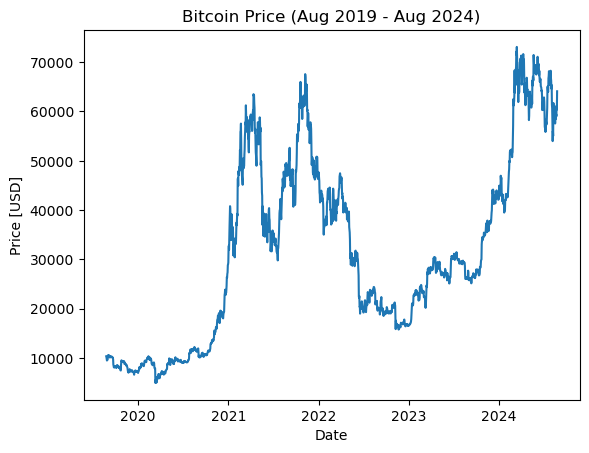

In [33]:
dates = data_tidy.Date
prices_normalized_btc = data_tidy.Close_BTC
title_btc = 'Bitcoin Price (Aug 2019 - Aug 2024)'

labels = ['Date', 'Price [USD]']

plot_market_data(dates, prices_normalized_btc, labels, title_btc)

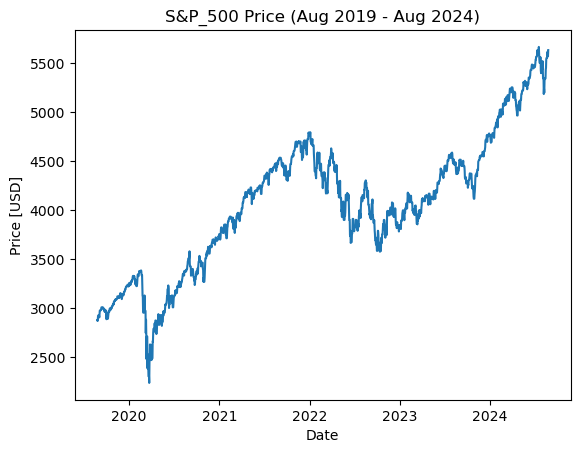

In [34]:
dates_sp_500 = data_tidy.Date
prices_normalized_sp_500  = data_tidy.Close_SP_500_Filled
title = 'S&P_500 Price (Aug 2019 - Aug 2024)'

labels = ['Date', 'Price [USD]']

plot_market_data(dates_sp_500, prices_normalized_sp_500, labels, title)

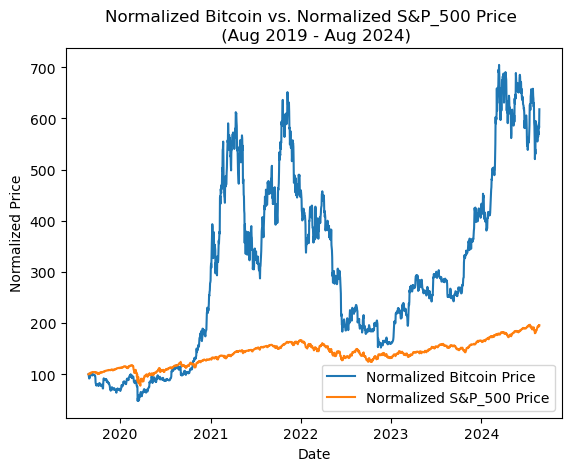

In [35]:
dates = data_tidy.Date
prices_normalized_btc = data_tidy.Normalized_Price_BTC
prices_normalized_sp_500  = data_tidy.Normalized_Price_SP_500
title_btc = "Normalized Bitcoin vs. Normalized S&P_500 Price \n (Aug 2019 - Aug 2024)"

labels = ["Date", "Normalized Price"]
legend = ["Normalized Bitcoin Price", "Normalized S&P_500 Price"]
prices = [prices_normalized_btc, prices_normalized_sp_500]

plot_multiple_market_data(dates, labels, legend, prices, title_btc)

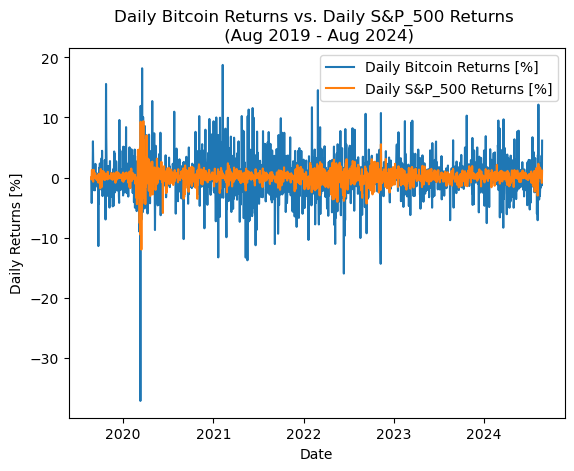

In [36]:
dates = data_tidy.Date
btc_returns = data_tidy.BTC_Return
sp_500_returns  = data_tidy.SP_500_Return
title_btc = "Daily Bitcoin Returns vs. Daily S&P_500 Returns \n (Aug 2019 - Aug 2024)"

returns = [btc_returns, sp_500_returns]
labels = ["Date", "Daily Returns [%]"]
legend = ["Daily Bitcoin Returns [%]", "Daily S&P_500 Returns [%]"]

plot_multiple_market_data(dates, labels, legend, returns, title_btc)

## References

[1] Kejriwal, S. (2024, July 5). Bitcoin and stock market correlation: An empirical study. Coin Bureau. https://coinbureau.com/analysis/bitcoin-and-stock-market-correlation/

[2] Ashford, K. (2024, May 21). What is bitcoin and how does it work? Forbes Advisor. https://www.forbes.com/advisor/investing/cryptocurrency/what-is-bitcoin/

[3] Kenton, W. (2024, June 12). S&P 500 Index: What It’s for and Why It’s Important in Investing. Investopedia. https://www.investopedia.com/terms/s/sp500.asp

[4] Yahoo is part of the Yahoo family of brands. (n.d.-d). https://finance.yahoo.com/quote/GC%3DF/history/?period1=1566763869&period2=1724616667

[5] Yahoo is part of the Yahoo family of brands. (n.d.-c). https://finance.yahoo.com/quote/GC%3DF/history/?period1=1566763767&period2=1724616565

[6] Yahoo is part of the Yahoo family of brands. (n.d.-e). https://finance.yahoo.com/quote/%5EIXIC/history/?period1=1566763946&period2=1724616740